# Parser nationallottery

Данной работе посмотрим на сайты лотерей России, попарсим данные, а также проверим действительно лотереи честные.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import requests
import re

from bs4 import BeautifulSoup
from urllib.parse import urljoin
from selenium.webdriver import Chrome

import certifi
import ssl
from urllib.request import urlopen

In [ ]:
pd.options.display.float_format = '{:20,.0f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### In cycle 

In [ ]:
for j in range(1, 4):
    driver = Chrome(executable_path=f"\\chromedriver.exe")
    driver.get(f"{sitee}/{j:06d}")
    soup = BeautifulSoup(driver.page_source, "lxml")
    driver.quit()

    title_class = soup.find_all(class_=re.compile('Title'))
    text_wrapper_class = soup.find_all(class_=re.compile('TextWrapper'))

    text_for_list = []
    for i in range(len(text_wrapper_class[1:35])):
        text_for_list.append(text_wrapper_class[1:35][i].text)
    for i in range(len(title_class)):
        text_for_list.append(title_class[i].text)

    good_list_text = []
    for i in range(len(text_for_list)):
        if text_for_list[i] == 'Лотереи':
            good_list_text.append(text_for_list[i])
            good_list_text.append(text_for_list[i+2])    
        elif text_for_list[i] == 'Дата тиража:':
            good_list_text.append(text_for_list[i])
            good_list_text.append(text_for_list[i+1])
        elif text_for_list[i] == 'Время тиража:':
            good_list_text.append(text_for_list[i])
            good_list_text.append(text_for_list[i+1])
        elif text_for_list[i] == 'Место проведения:':
            good_list_text.append(text_for_list[i])
            good_list_text.append(text_for_list[i+1])        
        elif text_for_list[i] == 'Число билетов, принявших участие в розыгрыше:':
            good_list_text.append(text_for_list[i])
            good_list_text.append(text_for_list[i+1])
        elif text_for_list[i] == 'Общая сумма выигрышей:':
            good_list_text.append(text_for_list[i])
            good_list_text.append(text_for_list[i+1])
        elif text_for_list[i] == 'Суперприз:':
            good_list_text.append(text_for_list[i])
            good_list_text.append(text_for_list[i+1])   
        elif text_for_list[i] == 'Выигрышная комбинация':
            good_list_text.append(text_for_list[i])
            good_list_text.append(text_for_list[i-1])

    df = pd.DataFrame(good_list_text[1::2]).T
    df.columns = good_list_text[0::2]

    if j == 1:
        df_null1 = pd.DataFrame(columns=['Лотереи', 'Дата тиража:', 'Время тиража:', 'Место проведения:',
           'Число билетов, принявших участие в розыгрыше:',
           'Общая сумма выигрышей:', 'Суперприз:', 'Выигрышная комбинация'])
        df_null1 = pd.concat([df_null1, df])
    else:
        df_null1 = pd.concat([df_null1, df])

In [ ]:
df_null1

,Лотереи,Дата тиража:,Время тиража:,Место проведения:,"Число билетов, принявших участие в розыгрыше:",Общая сумма выигрышей:,Суперприз:,Выигрышная комбинация
0,5 из 37,16 мая 2022,15:15 МСК,г. Москва,3,300 ₽,10 000 ₽,Итоги тиража № 000001
0,5 из 37,23 мая 2022,15:15 МСК,г. Москва,6,600 ₽,10 000 ₽,Итоги тиража № 000002
0,5 из 37,24 мая 2022,15:15 МСК,г. Москва,3,300 ₽,10 000 ₽,Итоги тиража № 000003


### In function all

In [ ]:
pd.options.display.float_format = '{:20,.0f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
def pars_nationallottery(site, start, finish):
    try:
        for j in range(start, finish):
            driver = Chrome(executable_path=f"\\chromedriver.exe")
            driver.get(f"{site}/{j:06d}")
            soup = BeautifulSoup(driver.page_source, "lxml")
            driver.quit()

            title_class = soup.find_all(class_=re.compile('Title'))
            text_wrapper_class = soup.find_all(class_=re.compile('TextWrapper'))

            text_for_list = []
            for i in range(len(text_wrapper_class[1:500])):
                text_for_list.append(text_wrapper_class[1:500][i].text)
            for i in range(len(title_class)):
                text_for_list.append(title_class[i].text)

            good_list_text = []
            for i in range(len(text_for_list)):
                if text_for_list[i] == 'Лотереи':
                    good_list_text.append(text_for_list[i])
                    good_list_text.append(text_for_list[i+2])    
                elif text_for_list[i] == 'Дата тиража:':
                    good_list_text.append(text_for_list[i])
                    good_list_text.append(text_for_list[i+1])
                elif text_for_list[i] == 'Время тиража:':
                    good_list_text.append(text_for_list[i])
                    good_list_text.append(text_for_list[i+1])
                elif text_for_list[i] == 'Место проведения:':
                    good_list_text.append(text_for_list[i])
                    good_list_text.append(text_for_list[i+1])        
                elif text_for_list[i] == 'Число билетов, принявших участие в розыгрыше:':
                    good_list_text.append(text_for_list[i])
                    good_list_text.append(text_for_list[i+1])
                elif text_for_list[i] == 'Общая сумма выигрышей:':
                    good_list_text.append(text_for_list[i])
                    good_list_text.append(text_for_list[i+1])
                elif text_for_list[i] == 'Суперприз:':
                    good_list_text.append(text_for_list[i])
                    good_list_text.append(text_for_list[i+1])   

            good_list_text.append('Тираж №')
            good_list_text.append(f"{j:06d}")
            good_list_text.append('Ссылка на тираж')
            good_list_text.append(f"{site}/{j:06d}")           
            
            df = pd.DataFrame(good_list_text[1::2]).T
            df.columns = good_list_text[0::2]

            if j == start:
                df_full = pd.DataFrame(columns=['Лотереи', 'Дата тиража:', 'Время тиража:', 'Место проведения:',
                   'Число билетов, принявших участие в розыгрыше:',
                   'Общая сумма выигрышей:', 'Суперприз:', 'Тираж №', 'Ссылка на тираж'])
                df_full = pd.concat([df_full, df])
            else:
                df_full = pd.concat([df_full, df])
    except:
        return df_full
    
    return df_full

In [ ]:
df_5_37 = pars_nationallottery('https://nationallottery.ru/lottery/digital-5x37/history/104011', 1, 57)
df_5_36_speed = pars_nationallottery('https://nationallottery.ru/lottery/digital-5x36/history/101031', 1, 167)
df_5_50= pars_nationallottery('https://nationallottery.ru/lottery/digital-5x50/history/101011', 1, 59)
df_super_8 = pars_nationallottery('https://nationallottery.ru/lottery/digital-8x20/history/101051', 1, 815)
df_3_3 = pars_nationallottery('https://nationallottery.ru/lottery/bingo-3x3/history/102091', 1, 755)
df_bingo_75 = pars_nationallottery('https://nationallottery.ru/lottery/bingo-75/history/102051', 1, 138)

In [ ]:
df_full = pd.concat([df_5_37, df_5_36_speed, df_5_50, df_super_8, df_3_3, df_bingo_75])

In [ ]:
df_full.head()

,Лотереи,Дата тиража:,Время тиража:,Место проведения:,"Число билетов, принявших участие в розыгрыше:",Общая сумма выигрышей:,Суперприз:,Тираж №,Ссылка на тираж
0,5 из 37,16 мая 2022,15:15 МСК,г. Москва,3,300 ₽,10 000 ₽,000001,https://nationallottery.ru/lottery/digital-5x3...
0,5 из 37,23 мая 2022,15:15 МСК,г. Москва,6,600 ₽,10 000 ₽,000002,https://nationallottery.ru/lottery/digital-5x3...
0,5 из 37,24 мая 2022,15:15 МСК,г. Москва,3,300 ₽,10 000 ₽,000003,https://nationallottery.ru/lottery/digital-5x3...
0,5 из 37,25 мая 2022,15:15 МСК,г. Москва,4,0 ₽,10 000 ₽,000004,https://nationallottery.ru/lottery/digital-5x3...
0,5 из 37,26 мая 2022,15:15 МСК,г. Москва,6,600 ₽,10 000 ₽,000005,https://nationallottery.ru/lottery/digital-5x3...


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 0
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Лотереи                                        1983 non-null   object
 1   Дата тиража:                                   1898 non-null   object
 2   Время тиража:                                  1898 non-null   object
 3   Место проведения:                              1898 non-null   object
 4   Число билетов, принявших участие в розыгрыше:  1898 non-null   object
 5   Общая сумма выигрышей:                         1898 non-null   object
 6   Суперприз:                                     1898 non-null   object
 7   Тираж №                                        1985 non-null   object
 8   Ссылка на тираж                                1985 non-null   object
dtypes: object(9)
memory usage: 155.1+ KB


In [ ]:
# df_full[df_full.isna().any(axis=1)]

In [ ]:
df_full_month = df_full['Дата тиража:'].str.split(' ', 2, expand=True)

In [ ]:
def norm_month(row):
    if row[1] == 'января': return f"{1:02d}"
    elif row[1] == 'февраля': return f"{2:02d}"
    elif row[1] == 'марта': return f"{3:02d}"
    elif row[1] == 'апреля': return f"{4:02d}"
    elif row[1] == 'мая': return f"{5:02d}"
    elif row[1] == 'июня': return f"{6:02d}"
    elif row[1] == 'июля': return f"{7:02d}"
    elif row[1] == 'августа': return f"{8:02d}"
    elif row[1] == 'сентября': return f"{9:02d}"
    elif row[1] == 'октября': return 10
    elif row[1] == 'ноября': return 11
    elif row[1] == 'декабря': return 12
    else: 'беда бедой'
        
df_full_month['month_number'] = df_full_month.apply(norm_month, axis=1)

In [ ]:
cols = [2, 'month_number', 0]
df_full['combined'] = df_full_month[cols].apply(lambda row: '.'.join(row.values.astype(str)), axis=1)

In [ ]:
df_full.columns = ['Лотереи', 'Дата тиража', 'Время тиража', 'Место проведения',
       'Число билетов, принявших участие в розыгрыше',
       'Общая сумма выигрышей', 'Суперприз', 'Тираж №', 'Ссылка на тираж', 'Дата']

In [ ]:
df_full.head()

,Лотереи,Дата тиража,Время тиража,Место проведения,"Число билетов, принявших участие в розыгрыше",Общая сумма выигрышей,Суперприз,Тираж №,Ссылка на тираж,Дата
0,5 из 37,16 мая 2022,15:15 МСК,г. Москва,3,300 ₽,10 000 ₽,000001,https://nationallottery.ru/lottery/digital-5x3...,2022.05.16
0,5 из 37,23 мая 2022,15:15 МСК,г. Москва,6,600 ₽,10 000 ₽,000002,https://nationallottery.ru/lottery/digital-5x3...,2022.05.23
0,5 из 37,24 мая 2022,15:15 МСК,г. Москва,3,300 ₽,10 000 ₽,000003,https://nationallottery.ru/lottery/digital-5x3...,2022.05.24
0,5 из 37,25 мая 2022,15:15 МСК,г. Москва,4,0 ₽,10 000 ₽,000004,https://nationallottery.ru/lottery/digital-5x3...,2022.05.25
0,5 из 37,26 мая 2022,15:15 МСК,г. Москва,6,600 ₽,10 000 ₽,000005,https://nationallottery.ru/lottery/digital-5x3...,2022.05.26


In [ ]:
# pd.to_datetime(df_full['combined'], format='%Y.%m.%d')

In [ ]:
df_full.to_excel('df_full.xlsx', engine='xlsxwriter', sheet_name='nationallottery', index=False)  

### In function all with 18.07.2022

In [ ]:
df_5_37 = pars_nationallottery('https://nationallottery.ru/lottery/digital-5x37/history/104011', 56, 60)
df_5_36_speed = pars_nationallottery('https://nationallottery.ru/lottery/digital-5x36/history/101031', 166, 170)
df_5_50= pars_nationallottery('https://nationallottery.ru/lottery/digital-5x50/history/101011', 58, 65)
df_super_8 = pars_nationallottery('https://nationallottery.ru/lottery/digital-8x20/history/101051', 814, 825)
df_3_3 = pars_nationallottery('https://nationallottery.ru/lottery/bingo-3x3/history/102091', 754, 765)
df_bingo_75 = pars_nationallottery('https://nationallottery.ru/lottery/bingo-75/history/102051', 137, 140)

In [ ]:
df_full = pd.concat([df_5_37, df_5_36_speed, df_super_8, df_3_3, df_bingo_75])

In [ ]:
df_full.head()

,Лотереи,Дата тиража:,Время тиража:,Место проведения:,"Число билетов, принявших участие в розыгрыше:",Общая сумма выигрышей:,Суперприз:,Тираж №,Ссылка на тираж
0,5 из 37,16 июля 2022,15:15 МСК,г. Москва,96,3 850 ₽,2 000 000 ₽,000056,https://nationallottery.ru/lottery/digital-5x37/history/104011/000056
0,5 из 37,17 июля 2022,15:15 МСК,г. Москва,115,82 500 ₽,2 000 000 ₽,000057,https://nationallottery.ru/lottery/digital-5x37/history/104011/000057
0,5 из 37,NaN,NaN,NaN,NaN,NaN,NaN,000058,https://nationallottery.ru/lottery/digital-5x37/history/104011/000058
0,5 из 37,NaN,NaN,NaN,NaN,NaN,NaN,000059,https://nationallottery.ru/lottery/digital-5x37/history/104011/000059
0,Пятая скорость,16 июля 2022,14:00 МСК,г. Москва,131,2 700 ₽,1 000 000 ₽,000166,https://nationallottery.ru/lottery/digital-5x36/history/101031/000166


In [ ]:
df_full = df_full.dropna()

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 0
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Лотереи                                       20 non-null     object
 1   Дата тиража                                   20 non-null     object
 2   Время тиража                                  20 non-null     object
 3   Место проведения                              20 non-null     object
 4   Число билетов, принявших участие в розыгрыше  20 non-null     object
 5   Общая сумма выигрышей                         20 non-null     object
 6   Суперприз                                     20 non-null     object
 7   Тираж №                                       20 non-null     object
 8   Ссылка на тираж                               20 non-null     object
 9   Дата                                          20 non-null     object
dtypes: ob

In [ ]:
df_full_month = df_full['Дата тиража:'].str.split(' ', 2, expand=True)

In [ ]:
def norm_month(row):
    if row[1] == 'января': return f"{1:02d}"
    elif row[1] == 'февраля': return f"{2:02d}"
    elif row[1] == 'марта': return f"{3:02d}"
    elif row[1] == 'апреля': return f"{4:02d}"
    elif row[1] == 'мая': return f"{5:02d}"
    elif row[1] == 'июня': return f"{6:02d}"
    elif row[1] == 'июля': return f"{7:02d}"
    elif row[1] == 'августа': return f"{8:02d}"
    elif row[1] == 'сентября': return f"{9:02d}"
    elif row[1] == 'октября': return 10
    elif row[1] == 'ноября': return 11
    elif row[1] == 'декабря': return 12
    else: 'беда бедой'
        
df_full_month['month_number'] = df_full_month.apply(norm_month, axis=1)

In [ ]:
cols = [2, 'month_number', 0]
df_full['combined'] = df_full_month[cols].apply(lambda row: '.'.join(row.values.astype(str)), axis=1)

In [ ]:
df_full.columns = ['Лотереи', 'Дата тиража', 'Время тиража', 'Место проведения',
       'Число билетов, принявших участие в розыгрыше',
       'Общая сумма выигрышей', 'Суперприз', 'Тираж №', 'Ссылка на тираж', 'Дата']

In [ ]:
df_full.head()

,Лотереи,Дата тиража,Время тиража,Место проведения,"Число билетов, принявших участие в розыгрыше",Общая сумма выигрышей,Суперприз,Тираж №,Ссылка на тираж,Дата
0,5 из 37,16 июля 2022,15:15 МСК,г. Москва,96,3 850 ₽,2 000 000 ₽,000056,https://nationallottery.ru/lottery/digital-5x37/history/104011/000056,2022.07.16
0,5 из 37,17 июля 2022,15:15 МСК,г. Москва,115,82 500 ₽,2 000 000 ₽,000057,https://nationallottery.ru/lottery/digital-5x37/history/104011/000057,2022.07.17
0,5 из 37,NaN,NaN,NaN,NaN,NaN,NaN,000058,https://nationallottery.ru/lottery/digital-5x37/history/104011/000058,nan.None.nan
0,5 из 37,NaN,NaN,NaN,NaN,NaN,NaN,000059,https://nationallottery.ru/lottery/digital-5x37/history/104011/000059,nan.None.nan
0,Пятая скорость,16 июля 2022,14:00 МСК,г. Москва,131,2 700 ₽,1 000 000 ₽,000166,https://nationallottery.ru/lottery/digital-5x36/history/101031/000166,2022.07.16


In [ ]:
df_full.to_excel('df_full_18.07.xlsx', engine='xlsxwriter', sheet_name='nationallottery', index=False)  

### Parse super 8

In [ ]:
def pars_nationallottery(site):
    try:
        for j in range(1, 3):
            driver = Chrome(executable_path=f"\\chromedriver.exe")
            driver.get(f"{site}/{j:06d}")
            soup = BeautifulSoup(driver.page_source, "lxml")
            driver.quit()

            title_class = soup.find_all(class_=re.compile('Title'))
            text_wrapper_class = soup.find_all(class_=re.compile('TextWrapper'))
        df = pd.DataFrame(good_list_text)
        
    except:
        return df
    
    return df

In [ ]:
df_super_8 = pars_nationallottery('https://nationallottery.ru/lottery/digital-8x20/history/101051', 1, 815)

In [ ]:
driver = Chrome(executable_path=f"_win32\\chromedriver.exe")
driver.get(f"https:/ottery/digital-8x20/history/101051/000002")
soup = BeautifulSoup(driver.page_source, "lxml")
driver.quit()

In [ ]:
text_wrapper_class = soup.find_all(class_=re.compile('TextWrapper'))
text_wrapper_class

# Parser Stoloto

In [ ]:
df_full.head()

,Лотереи,Дата тиража:,Время тиража:,Место проведения:,"Число билетов, принявших участие в розыгрыше:",Общая сумма выигрышей:,Суперприз:,Тираж №
0,,16 мая 2022,15:15 МСК,г. Москва,3,300 ₽,10 000 ₽,000001
0,5 из 37,23 мая 2022,15:15 МСК,г. Москва,6,600 ₽,10 000 ₽,000002
0,5 из 37,24 мая 2022,15:15 МСК,г. Москва,3,300 ₽,10 000 ₽,000003
0,5 из 37,25 мая 2022,15:15 МСК,г. Москва,4,0 ₽,10 000 ₽,000004
0,5 из 37,26 мая 2022,15:15 МСК,г. Москва,6,600 ₽,10 000 ₽,000005


In [ ]:
def get_page_soup(url: str):
    r = requests.get(url)
    r.encoding='utf-8'
    if not r.ok:
        return None
    soup = BeautifulSoup(r.text, "lxml")
    return soup

In [ ]:
soup = get_page_soup("https://www.stoloto.ru/rapido/archive?from=17.07.2022&to=17.07.2022&firstDraw=250651&lastDraw=250700&mode=draw")

In [ ]:
print(soup.prettify())

In [ ]:
soup.find_all("div", class_="draw")[1].text

'\n250700\n'

________

In [ ]:
soup.select("div.draw_date")[1].text

'17.07.2022 17:07:30'

In [ ]:
soup.select("div.draw")[1].text

'\n250700\n'

In [ ]:
re.search(r'\d+', str(soup.select("div.draw")[1].text)).group()

'250700'

In [ ]:
pr = list(soup.select("div.numbers")[1].find_all("b"))

In [ ]:
pr

[<b>3 </b>,
 <b>7 </b>,
 <b>1 </b>,
 <b>18 </b>,
 <b>8 </b>,
 <b>15 </b>,
 <b>5 </b>,
 <b>13 </b>,
 <b class="extra">3 </b>]

In [ ]:
pr = list(soup.select("div.numbers")[1].find_all("b"))
z = []
for i in pr:
    z.append(re.search(r'\d+', str(i)).group())
z

['3', '7', '1', '18', '8', '15', '5', '13', '3']

In [ ]:
soup.select("div.prize")[21].text

'\n\t\t\t\t23\xa0725\xa0050\n\t\t\t'

In [ ]:
re.search(r'\d+', str(soup.select("div.prize")[1].text)).group()

'5'

_________

In [ ]:
data_circ = soup.select("div.draw_date")[1].text

In [ ]:
circulation = re.search(r'\d+', str(soup.select("div.draw")[1].text)).group()

In [ ]:
prize = re.search(r'\d+', str(soup.select("div.prize")[1].text)).group()

In [ ]:
pr = list(soup.select("div.numbers")[1].find_all("b"))
combinations  = []
combinations.append(data_circ)
combinations.append(circulation)
for i in pr:
    combinations.append(re.search(r'\d+', str(i)).group())
combinations.append(prize)

In [ ]:
combinations

['17.07.2022 17:07:30',
 '250700',
 '3',
 '7',
 '1',
 '18',
 '8',
 '15',
 '5',
 '13',
 '3',
 '5']

In [ ]:
dffff.columns = ['Тираж', 'Число_1', 'Число_2', 'Число_3', 'Число_4', 'Число_5', 'Число_6', 'Число_7', 'Число_8',
                 'Второй_ряд', 'Суперприз']

In [ ]:
dffff = pd.DataFrame(combinations).T

In [ ]:
dffff

,Тираж,Число_1,Число_2,Число_3,Число_4,Число_5,Число_6,Число_7,Число_8,Второй_ряд,Суперприз
0,250700,3,7,1,18,8,15,5,13,3,5


## BeautifulSoup in func

### Rapido

In [ ]:
def get_page_soup(url: str):
    r = requests.get(url)
    r.encoding='utf-8'
    if not r.ok:
        return None
    soup = BeautifulSoup(r.text, "lxml")
    return soup

def stolotoparser(site, start, deep):
    
    for j in range(start, start+49*deep, 49):
        soup = get_page_soup(
            f"{site}/arc22&firstDraw={j}&lastDraw={j+49}&mode=draw")

        for i in range(1, 5[i].text
            circulation = re.search(r'\d+', str(soup.select("div.draw")[i].text)).group()
            prize = re.search(r'\d+', str(soup.select("div.prize")[i].text)).group()
            pr = list(soup.select("div.numbers")[i].find_all("b"))
            combinations  = []
            combinations.append(data_circ)
            combinations.append(circulation)
            for k in pr:
                combinations.append(re.search(r'\d+', str(k)).group())
            combinations.append(prize)
            df = pd.DataFrame(combinations).T

            if j == start and i == 1:
                df_full = df
            else:
                df_full = pd.concat([df_full, df])
            
    df_full.columns = ['Дата', 'Тираж', 'Число_1', 'Число_2', 'Число_3', 'Число_4', 'Число_5', 'Число_6', 'Число_7', 'Число_8',
                 'Второй_ряд', 'Суперприз']    
    return df_full

In [ ]:
df_rapid_stoloto = stolotoparser(site='https://www.stoloto.ru/rapido', start=100000, deep=3075)

In [ ]:
df_rapid_stoloto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153750 entries, 0 to 0
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Дата        153750 non-null  object
 1   Тираж       153750 non-null  int16 
 2   Число_1     153750 non-null  int16 
 3   Число_2     153750 non-null  int16 
 4   Число_3     153750 non-null  int16 
 5   Число_4     153750 non-null  int16 
 6   Число_5     153750 non-null  int16 
 7   Число_6     153750 non-null  int16 
 8   Число_7     153750 non-null  int16 
 9   Число_8     153750 non-null  int16 
 10  Второй_ряд  153750 non-null  int16 
 11  Суперприз   153750 non-null  int16 
dtypes: int16(11), object(1)
memory usage: 5.6+ MB


In [ ]:
df_rapid_stoloto['Тираж'] = df_rapid_stoloto['Тираж'].astype('int16')
df_rapid_stoloto['Число_1'] = df_rapid_stoloto['Число_1'].astype('int16')
df_rapid_stoloto['Число_2'] = df_rapid_stoloto['Число_2'].astype('int16')
df_rapid_stoloto['Число_3'] = df_rapid_stoloto['Число_3'].astype('int16')
df_rapid_stoloto['Число_4'] = df_rapid_stoloto['Число_4'].astype('int16')
df_rapid_stoloto['Число_5'] = df_rapid_stoloto['Число_5'].astype('int16')
df_rapid_stoloto['Число_6'] = df_rapid_stoloto['Число_6'].astype('int16')
df_rapid_stoloto['Число_7'] = df_rapid_stoloto['Число_7'].astype('int16')
df_rapid_stoloto['Число_8'] = df_rapid_stoloto['Число_8'].astype('int16')
df_rapid_stoloto['Второй_ряд'] = df_rapid_stoloto['Второй_ряд'].astype('int16')
df_rapid_stoloto['Суперприз'] = df_rapid_stoloto['Суперприз'].astype('int16')

In [ ]:
df_rapid_stoloto.to_excel('df_rapid_stoloto.xlsx', engine='xlsxwriter', sheet_name='nationallottery', index=False)  

<AxesSubplot:xlabel='Число_1'>

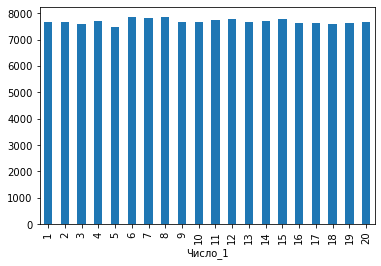

In [ ]:
df_rapid_stoloto.groupby('Число_1')['Число_1'].count().plot(kind='bar')

<AxesSubplot:xlabel='Число_2'>

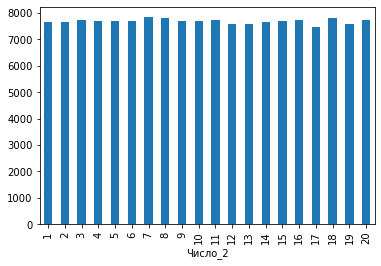

In [ ]:
df_rapid_stoloto.groupby('Число_2')['Число_2'].count().plot(kind='bar')

In [ ]:
df_rapid_stoloto.groupby('Число_2')['Число_2'].count().plot(kind='bar')

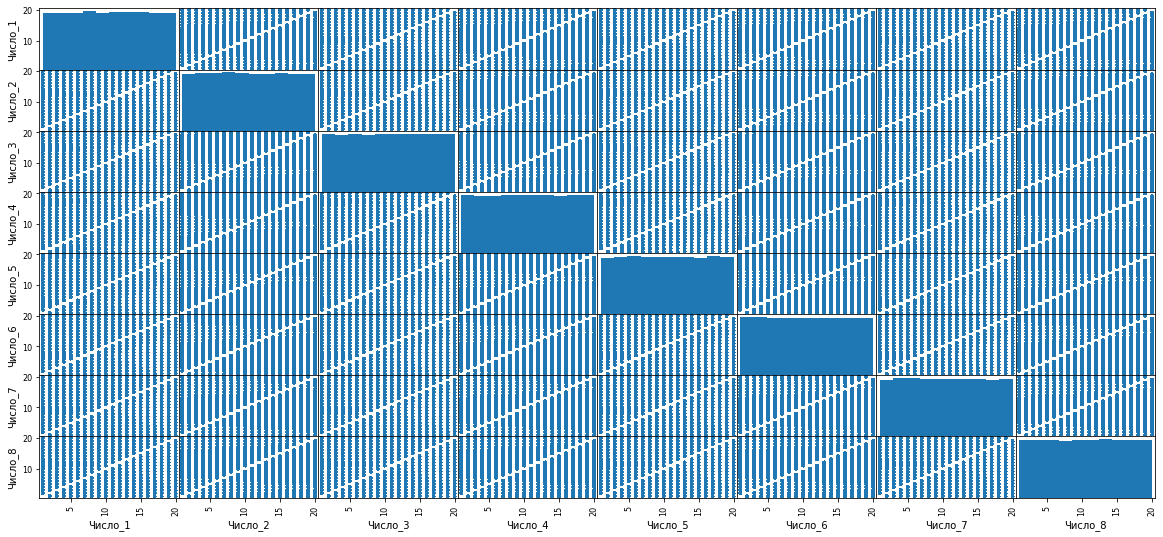

In [ ]:
pd.plotting.scatter_matrix(df_rapid_stoloto[['Число_1', 'Число_2', 'Число_3', 'Число_4', 'Число_5',
                                              'Число_6', 'Число_7', 'Число_8']], figsize=(20, 9))
plt.show()

<AxesSubplot:xlabel='Второй_ряд'>

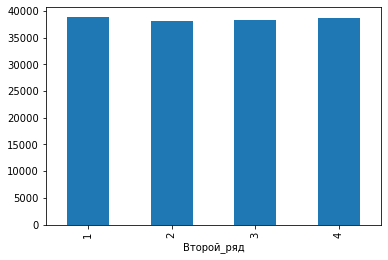

In [ ]:
df_rapid_stoloto.groupby('Второй_ряд')['Второй_ряд'].count().plot(kind='bar')

### All or nothing

In [ ]:
def get_page_soup(url: str):
    r = requests.get(url)
    r.encoding='utf-8'
    if not r.ok:
        return None
    soup = BeautifulSoup(r.text, "lxml")
    return soup

def stolotoparser(site, start, deep):
    
    for j in range(start, start+49*deep, 49):
        soup = get_page_soup(
            f"{site}/archive?from=17.07.2022&to=17.07.2022&firstDraw=lastDraw=mode=draw")

        for i in range(1, 24):
            data_circ = soup.select("div.draw_date")[i].text
            circulation = re.search(r'\d+', str(soup].text)).group()
            prize = re.search(r'\d+', str(soup.select("div.pritext)).group()
            pr = list(soup.select("div.numbers")[i].find_all("b"))
            combinations  = []
            combinations.append(data_circ)
            combinations.append(circulation)
            for k in pr:
                combinations.append(re.search(r'\d+', str(k)).group())
            combinations.append(prize)
            df = pd.DataFrame(combinations).T

            if j == start and i == 1:
                df_full = df
            else:
                df_full = pd.concat([df_full, df])
            
#         df_full.columns = ['Дата', 'Тираж', 'Число_1', 'Число_2', 'Число_3', 'Число_4', 'Число_5', 'Число_6', 'Число_7', 'Число_8', 'Число_9', 'Число_10', 'Число_11', 'Число_12',  'Суперприз']    
    return df_full

In [ ]:
df_all_or_nothing_stoloto = stolotoparser(site='http://www.stoloto.ru/1224', start=46000, deep=71)

In [ ]:
df_all_or_nothing_stoloto.columns = ['Дата', 'Тираж', 'Число_1', 'Число_2', 'Число_3', 'Число_4', 'Число_5', 'Число_6', 'Число_7', 'Число_8', 'Число_9', 'Число_10', 'Число_11', 'Число_12',  'Суперприз']    

In [ ]:
df_all_or_nothing_stoloto.head()

,Дата,Тираж,Число_1,Число_2,Число_3,Число_4,Число_5,Число_6,Число_7,Число_8,Число_9,Число_10,Число_11,Число_12,Суперприз
0,09.06.2022 07:30:00,46049,14,21,2,4,15,22,13,17,7,23,19,5,4
0,09.06.2022 07:15:00,46048,2,13,4,15,20,5,8,6,17,19,14,11,4
0,09.06.2022 07:00:00,46047,6,13,18,20,24,14,2,1,19,21,22,3,4
0,09.06.2022 06:45:00,46046,4,17,13,24,21,6,12,11,14,7,23,1,4
0,09.06.2022 06:30:00,46045,16,4,6,12,17,9,22,3,19,18,14,7,4


In [ ]:
df_all_or_nothing_stoloto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 0 to 0
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Дата       1633 non-null   object
 1   Тираж      1633 non-null   object
 2   Число_1    1633 non-null   object
 3   Число_2    1633 non-null   object
 4   Число_3    1633 non-null   object
 5   Число_4    1633 non-null   object
 6   Число_5    1633 non-null   object
 7   Число_6    1633 non-null   object
 8   Число_7    1633 non-null   object
 9   Число_8    1633 non-null   object
 10  Число_9    1633 non-null   object
 11  Число_10   1633 non-null   object
 12  Число_11   1633 non-null   object
 13  Число_12   1633 non-null   object
 14  Суперприз  1633 non-null   object
dtypes: object(15)
memory usage: 204.1+ KB


In [ ]:
df_all_or_nothing_stoloto['Тираж'] = df_all_or_nothing_stoloto['Тираж'].astype('int')
df_all_or_nothing_stoloto['Число_1'] = df_all_or_nothing_stoloto['Число_1'].astype('int16')
df_all_or_nothing_stoloto['Число_2'] = df_all_or_nothing_stoloto['Число_2'].astype('int16')
df_all_or_nothing_stoloto['Число_3'] = df_all_or_nothing_stoloto['Число_3'].astype('int16')
df_all_or_nothing_stoloto['Число_4'] = df_all_or_nothing_stoloto['Число_4'].astype('int16')
df_all_or_nothing_stoloto['Число_5'] = df_all_or_nothing_stoloto['Число_5'].astype('int16')
df_all_or_nothing_stoloto['Число_6'] = df_all_or_nothing_stoloto['Число_6'].astype('int16')
df_all_or_nothing_stoloto['Число_7'] = df_all_or_not df_all_or_nothing_stoloto['Число_8'].astype('int16')
df_all_or_nothing_stoloto['Число_9'] = df_all_or_nothing_stoloto['Число_9'].astype('int16')
df_all_or_nothing_stoloto['Число_10'] = df_all_or_nothing_stoloto['Число_10'].astype('int16')
df_all_or_nothing_stoloto['Число_11'] = df_all_or_nothing_stoloto['Число_11'].astype('int16')
df_all_or_nothing_stoloto['Число_12'] = df_all_or_nothing_stoloto['Число_12'].astype('int16')
df_all_or_nothing_stoloto['Суперприз'] = df_all_or_nothing_stoloto['Суперприз'].astype('int16')

In [ ]:
df_all_or_nothing_stoloto.describe()

,Тираж,Число_1,Число_2,Число_3,Число_4,Число_5,Число_6,Число_7,Число_8,Число_9,Число_10,Число_11,Число_12,Суперприз
count,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000
mean,47753.000000,12.703001,12.668096,12.446418,12.429271,12.525413,12.254133,12.609308,12.385181,12.744029,12.714023,12.383344,12.761788,6.787508
std,1004.530702,6.925326,6.847163,6.885156,7.001929,6.961783,6.901776,6.872113,7.024324,6.862042,6.935251,7.000614,6.885724,4.566989
min,46027.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,46877.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,3.000000
50%,47753.000000,13.000000,13.000000,13.000000,12.000000,13.000000,12.000000,13.000000,12.000000,13.000000,13.000000,12.000000,13.000000,5.000000
75%,48629.000000,19.000000,18.000000,18.000000,19.000000,19.000000,18.000000,19.000000,19.000000,18.000000,19.000000,19.000000,19.000000,10.000000
max,49479.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,20.000000


<AxesSubplot:xlabel='Число_1'>

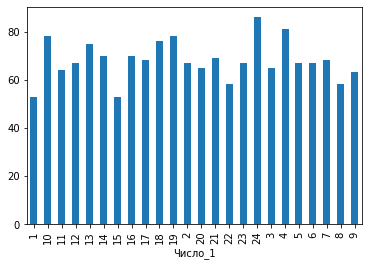

In [ ]:
df_all_or_nothing_stoloto.groupby('Число_1')['Число_1'].count().plot(kind='bar')

<AxesSubplot:xlabel='Число_2'>

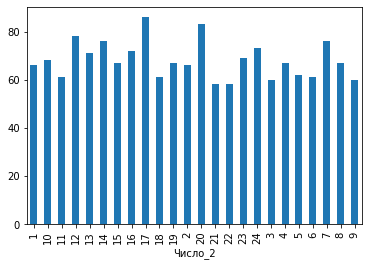

In [ ]:
df_all_or_nothing_stoloto.groupby('Число_2')['Число_2'].count().plot(kind='bar')

Распределение чисел равномерное, что означает лотерея СТОЛОТО честная. Играем :)